# Задание №2

### Выделить и посчитать монеты: общее количество, большие отдельно, маленькие отдельно.

* Подключим необходимые библиотеки.

In [57]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

* Загрузим изображение.

In [58]:
img = cv.imread('money.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [59]:
def show(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    #plt.title(text)
    plt.show()

* Исходное изображение.

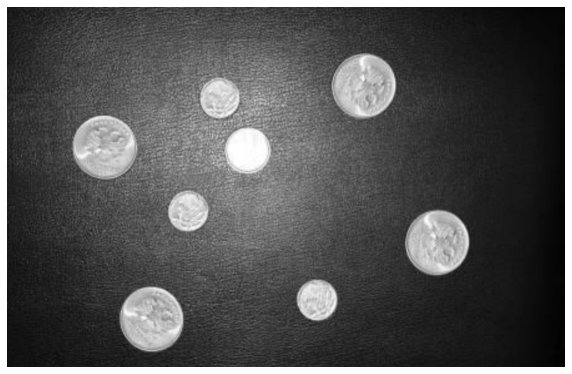

In [60]:
show(gray)

* Бинаризируем исходное изображение.

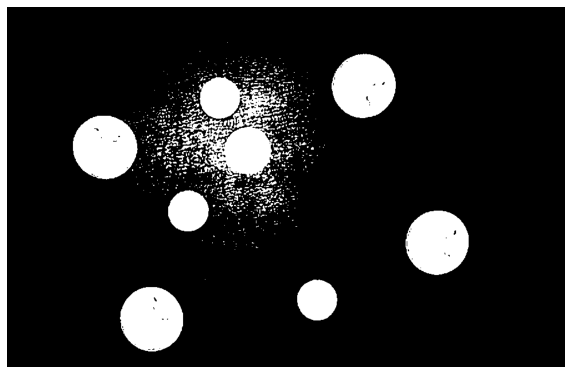

In [61]:
ret, thresh = cv.threshold(gray,140,255,cv.THRESH_BINARY)
show(thresh)

In [62]:
kernel = np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ], dtype=np.uint8)

* Удалим лишние шумы.

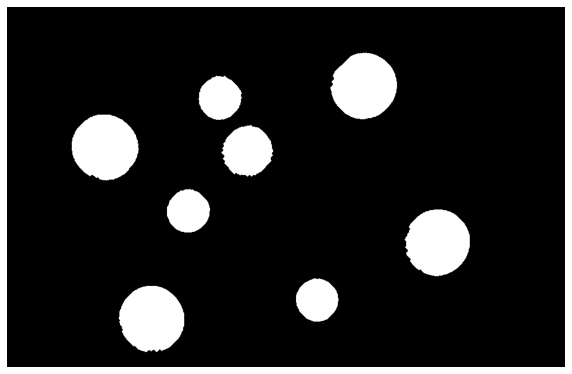

In [63]:
#erode = cv.erode(thresh, kernel, iterations=6)
#erode = cv.cvtColor(erode,cv.COLOR_BGR2GRAY)
opening1 = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 6)
opening = cv.dilate(opening1, kernel, iterations = 2)
show(opening)

* Посчитаем общее количество монет.

In [64]:
total, markersAll = cv.connectedComponents(opening)
AllMonets = total-1
print('На исходном изображении: ', AllMonets, ' монет.')

На исходном изображении:  8  монет.


* Удалим маленькие монеты так, чтобы остались только большие.

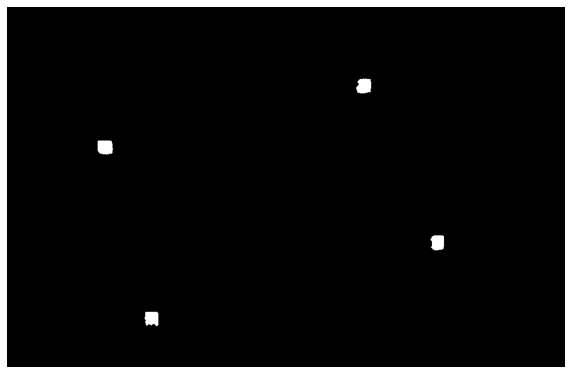

In [65]:
dil2 = cv.erode(opening, kernel, iterations = 45)
show(dil2)

* Посчитаем количество больших монет.

In [66]:
total, markers = cv.connectedComponents(dil2)

In [67]:
BigMonets = total-1
SmallMonets = AllMonets - BigMonets

* Ответ:

In [68]:
print('Всего монет: ', AllMonets, ', маленьких: ', SmallMonets, ', больших: ', BigMonets)

Всего монет:  8 , маленьких:  4 , больших:  4


* Выделим монеты

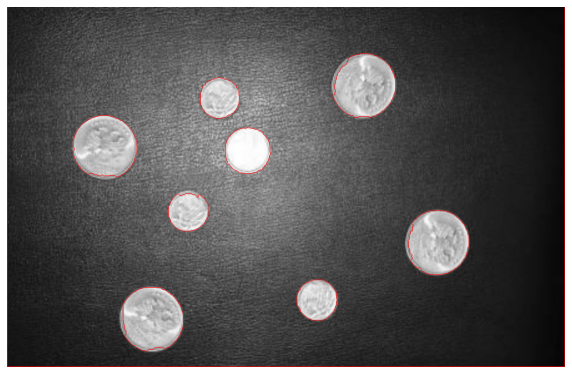

In [70]:
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.4*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(opening,sure_fg)
ret, markers = cv.connectedComponents(sure_fg)
markers = markers +1
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255, 0, 0]
show(img)